In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

In [59]:
data = pd.read_csv('FreshData.csv', encoding='unicode_escape')

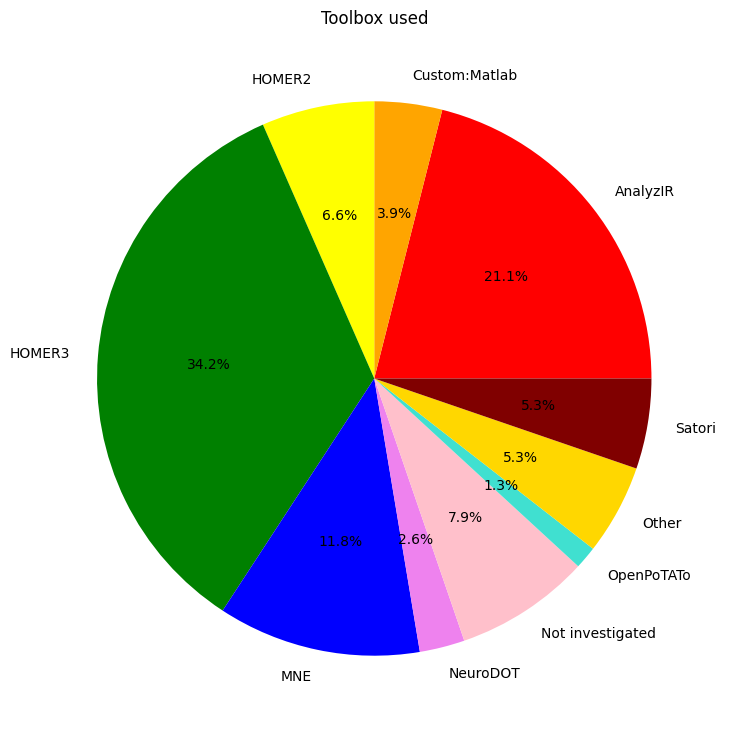

In [6]:
# some teams used more than one toolbox 
name = 'Toolbox used'
strings = data['Toolbox used']
teams = 2* 38
newstring = []

for word in strings: 
    if type(word) == str:  
        word = word.replace('.', ',')
        word = word.replace(': ', ':')
        words = word.split(",")
        newstring.append(words[0].strip())

count = Counter(newstring )
label = sorted(list(set(newstring)))
sizes = []
for word in label: 
    sizes.append(100/teams * count[word])
    
pretty_colors = {
    'red': '#FF0000',
    'orange': '#FFA500',
    'yellow': '#FFFF00',
    'green': '#008000',
    'blue': '#0000FF',
    #'indigo': '#4B0082',
    'violet': '#EE82EE',
    'pink': '#FFC0CB',
    #'purple': '#800080',
    'turquoise': '#40E0D0',
    'gold': '#FFD700',
    'maroon': '#800000',
    'cyan': '#00FFFF',}


fig, ax = plt.subplots()
ax.pie(sizes, labels=label, autopct='%1.1f%%', colors = pretty_colors)
ax.set_title(name)
fig.set_size_inches(9,9)

In [4]:
pretty_colors = {
    'red': '#FF0000',
    'orange': '#FFA500',
    'yellow': '#FFFF00',
    'green': '#008000',
    'blue': '#0000FF',
    'indigo': '#4B0082',
    'violet': '#EE82EE',
    'pink': '#FFC0CB',
    'purple': '#800080',
    'turquoise': '#40E0D0',
    'gold': '#FFD700',
    'maroon': '#800000',
    'cyan': '#00FFFF',}

Text(0, 0.5, 'Usage Percentage of Specified Methods')

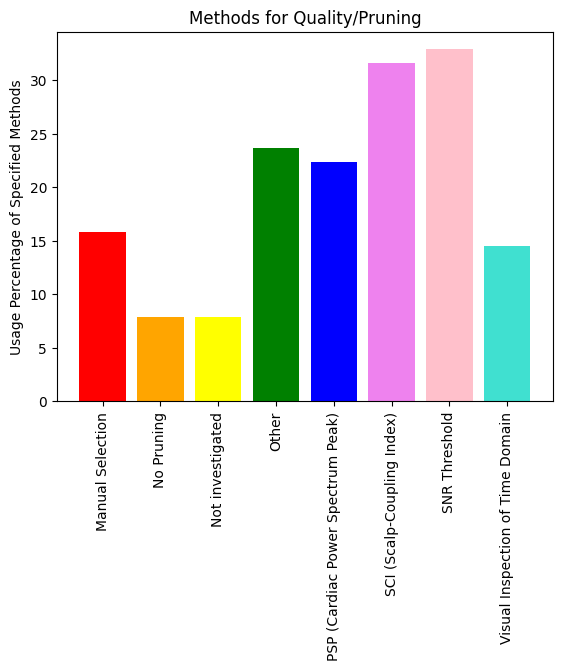

In [7]:
# some teams used multiple methods 
name = 'Quality/Pruning: Method'
strings = data[name]
newstring = []
for word in strings:
    if type(word) != str:
        newstring.append('No Pruning')
    if type(word) == str: 
        word = word.replace('.', ',')
        word = word.replace(': ', ':')
        words = word.split(",")
        for j in words: 
            if j != '':
                newstring.append(j.strip())
                
count = Counter(newstring )
label = sorted(list(set(newstring)))
sizes = []
for word in label: 
    sizes.append(100/teams * count[word])


plt.bar(label, sizes, color = pretty_colors )
plt.title('Methods for Quality/Pruning')
plt.xticks(label, rotation=90)
plt.ylabel('Usage Percentage of Specified Methods')

Text(0, 0.5, 'Usage Percentage of Specified Methods')

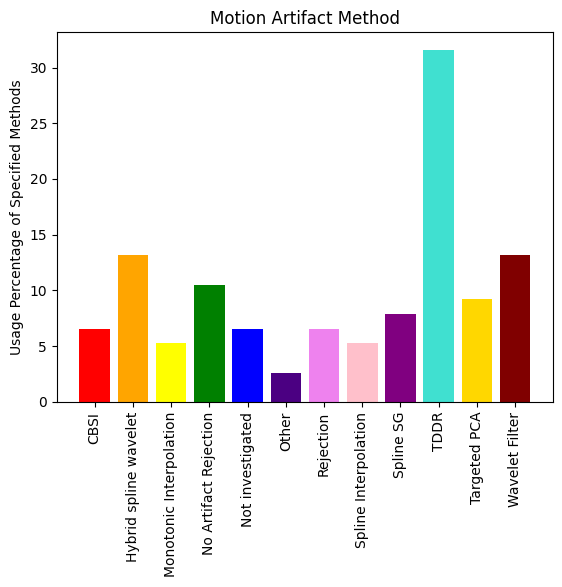

In [8]:
# teams used multiple methods 
name = 'Motion Artifact Method'
strings = data[name]
newstring = []
for word in strings:
    if type(word) != str:
        newstring.append('No Artifact Rejection')
    if type(word) == str:
        word = word.replace('.', ',')
        word = word.replace(': ', ':')
        words = word.split(",")
        for j in words: 
            if j != '':
                newstring.append(j.strip())
                
count = Counter(newstring )
label = sorted(list(set(newstring)))
sizes = []
for word in label: 
    sizes.append(100/teams * count[word])
pretty_colors = {
    'red': '#FF0000',
    'orange': '#FFA500',
    'yellow': '#FFFF00',
    'green': '#008000',
    'blue': '#0000FF',
    'indigo': '#4B0082',
    'violet': '#EE82EE',
    'pink': '#FFC0CB',
    'purple': '#800080',
    'turquoise': '#40E0D0',
    'gold': '#FFD700',
    'maroon': '#800000',
    'cyan': '#00FFFF',}

plt.bar(label, sizes, color = pretty_colors )
plt.title(name)
plt.xticks(label, rotation=90)
plt.ylabel('Usage Percentage of Specified Methods')

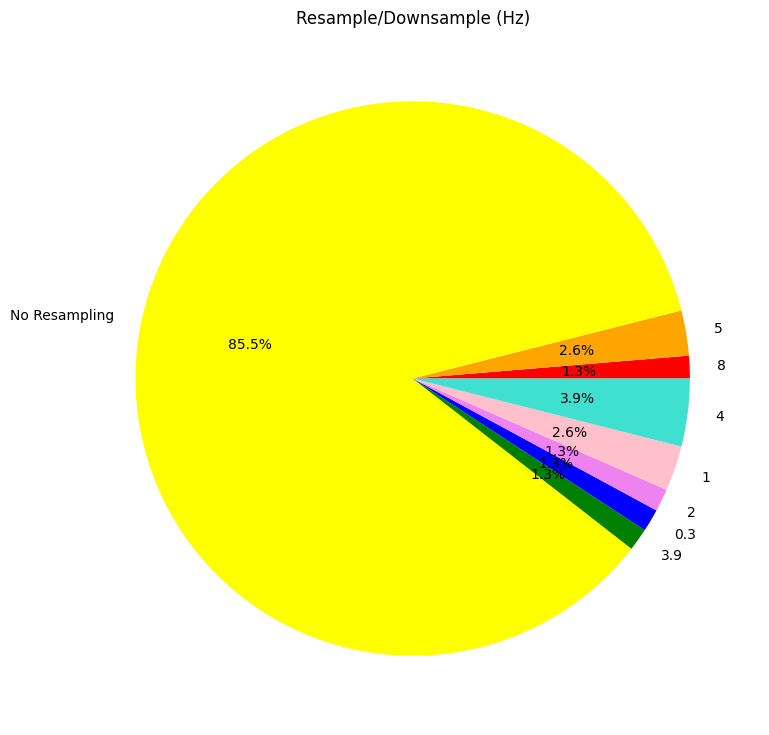

In [72]:
import math
name = 'Resample/Downsample (Hz)'
strings = data[name].copy()
strings = strings.fillna('Not investigated')

newstring = []
for word in strings:
    newstring.append(word)
           
count = Counter(newstring )
count['No Resampling'] = count['Not investigated']

label = ['8', '5', 'No Resampling' , '3.9', '0.3', '2', '1', '4']
sizes = []

for word in label: 
    sizes.append(count[word])

    
pretty_colors = {
    'red': '#FF0000',
    'orange': '#FFA500',
    'yellow': '#FFFF00',
    'green': '#008000',
    'blue': '#0000FF',
    #'indigo': '#4B0082',
    'violet': '#EE82EE',
    'pink': '#FFC0CB',
    #'purple': '#800080',
    'turquoise': '#40E0D0',
    'gold': '#FFD700',
    'maroon': '#800000',
    'cyan': '#00FFFF',}
fig, ax = plt.subplots()
ax.pie(sizes, labels=label, autopct='%1.1f%%', colors = pretty_colors)
ax.set_title('Resample/Downsample (Hz)')
fig.set_size_inches(9,9)

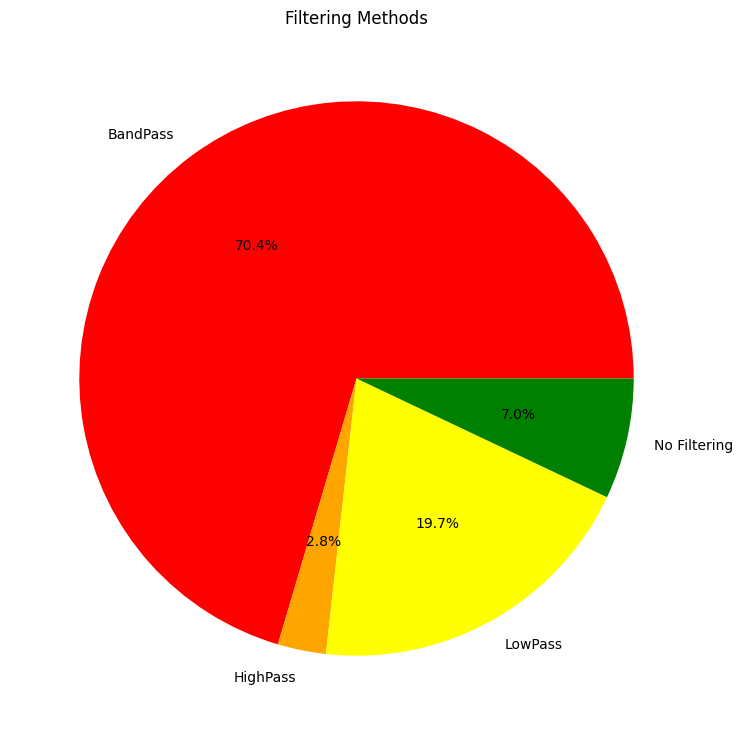

In [11]:
name = 'Filtering'
strings = data[name]
newstring = []
Filter = np.zeros((len(strings), 2))
i = -1 
for word in strings:
    i = i +1 
    if word == 'LowPass,HighPass' or word == 'HighPass,LowPass': 
        Filter[i, 0]  = 1 
        Filter[i,1]  = 1 
        newstring.append('BandPass')
    if type(word) != str:
        newstring.append('No Filtering')
    if word == 'HighPass':
        Filter[i, 0]  = 1 
        newstring.append('HighPass')
    if word == 'LowPass': 
        newstring.append('LowPass')
        Filter[i, 1]  = 1 
                
count = Counter(newstring )
label = sorted(list(set(newstring)))
sizes = []
for word in label: 
    sizes.append(100/teams * count[word])
pretty_colors = {
    'red': '#FF0000',
    'orange': '#FFA500',
    'yellow': '#FFFF00',
    'green': '#008000',
    'blue': '#0000FF',
    'indigo': '#4B0082',
    'violet': '#EE82EE',
    'pink': '#FFC0CB',
    'purple': '#800080',
    'turquoise': '#40E0D0',
    'gold': '#FFD700',
    'maroon': '#800000',
    'cyan': '#00FFFF',}

fig, ax = plt.subplots()
ax.pie(sizes, labels=label, autopct='%1.1f%%', colors = pretty_colors)
ax.set_title('Filtering Methods')
fig.set_size_inches(9,9)

Counter({'BandPass': 50, 'LowPass': 14, 'No Filtering': 5, 'HighPass': 2})


Text(0.5, 1.0, 'Filtering Methods')

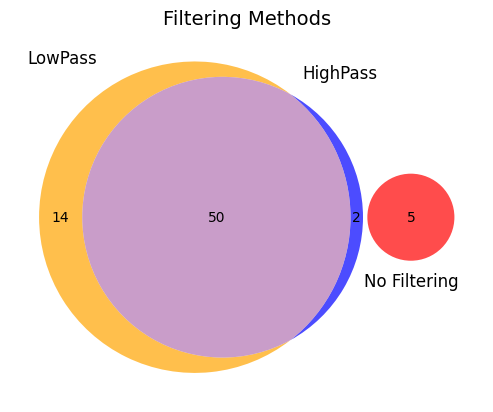

In [16]:
import matplotlib_venn as venn
print(count)
v = venn.venn3(subsets=(count['LowPass'], count['HighPass'] , count['BandPass'], count['No Filtering'] ,0 , 0, 0),  
      set_labels=('HighPass', 'LowPass', 'No Filtering'),  
      set_colors=("orange", "blue", "red"), alpha=0.7)

lbl = v.get_label_by_id("A")
x, y = lbl.get_position()
lbl.set_position((x+0.5, y+1.1))  
lbl = v.get_label_by_id("B")
x, y = lbl.get_position()
lbl.set_position((x-0.55, y+1.1))
plt.title("Filtering Methods",fontsize=14) 

Left out: 0.5
Left out: 0.5
Left out: 1.2
Left out: 1.2


Text(0.5, 0, 'Cutoff Frequency')

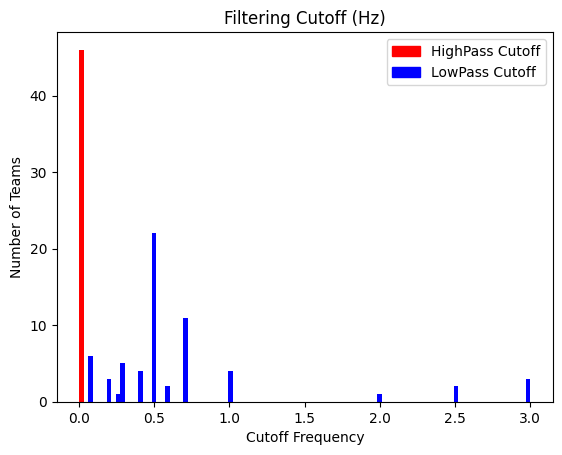

In [18]:
name = 'Filtering Cutoff (Hz_cutoff; type; order)'
strings = data[name]
lowpass = []
highpass = []
for word in strings:
    if word != 'N/A (no filter)' and type(word) == str:
        word = word.replace(',', ';')
        values = word.split(";")
        for j in values: 
            if 'hp' in j:
                a = ''.join([n for n in j if n.isdigit()])
                a = a[0]+ '.' + a[1:]
                if float(a) < 0.3:
                    highpass.append(float(a))
                else: 
                    print('Left out: ' + a)
            if 'lp' in j:
                b = ''.join([n for n in j if n.isdigit()])
                b = b[0]+ '.' + b[1:]
                lowpass.append(float(b))

d = np.reshape(np.array(highpass+ lowpass), (110, 1))
N, bins, patches = plt.hist(d  , bins = 100 )

for i in range(1):
    patches[i].set_facecolor('r')
for i in range(2,100):
    patches[i].set_facecolor('b')


import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='HighPass Cutoff')
blue_patch = mpatches.Patch(color='blue', label='LowPass Cutoff')
plt.legend(handles=[red_patch, blue_patch])

plt.title('Filtering Cutoff (Hz)')
plt.ylabel('Number of Teams')
plt.xlabel('Cutoff Frequency')

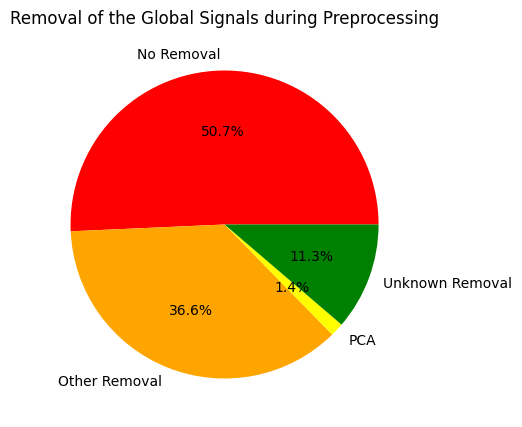

In [19]:
name = 'Removal of the Global Signals during Preprocessing'
strings = data[name]
newstring = []
for word in strings:
    if word == 'Other': 
        newstring.append('Other Removal')
    if type(word) != str: # check for nan 
        newstring.append('Unknown Removal')
    if word == 'PCA':
        newstring.append('PCA')
    if word == 'No': 
        newstring.append('No Removal')
                
count = Counter(newstring )
label = sorted(list(set(newstring)))
sizes = []
for word in label: 
    sizes.append(100/teams * count[word])
pretty_colors = {
    'red': '#FF0000',
    'orange': '#FFA500',
    'yellow': '#FFFF00',
    'green': '#008000',
    'blue': '#0000FF',
    'indigo': '#4B0082',
    'violet': '#EE82EE',
    'pink': '#FFC0CB',
    'purple': '#800080',
    'turquoise': '#40E0D0',
    'gold': '#FFD700',
    'maroon': '#800000',
    'cyan': '#00FFFF',}

fig, ax = plt.subplots()
ax.pie(sizes, labels=label, autopct='%1.1f%%', colors = pretty_colors)
ax.set_title('Removal of the Global Signals during Preprocessing')
fig.set_size_inches(5,5)

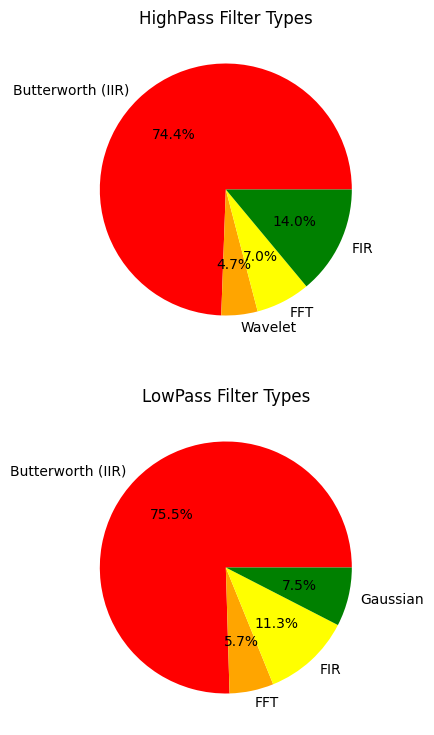

In [20]:
# find out who filtered how: 
name = 'Filtering (type; order)'
strings = data[name]
hp = []
lp = []
for i in range(len(strings)): 
    if  Filter[i,0] == 1: 
        hp.append(strings[i])
    if  Filter[i, 1] == 1: 
        lp.append(strings[i])

# Type of filter for highpass: 
butter = 0
wavelet = 0
FFT = 0
fir = 0
for word in hp:
    if type(word) == str: 
        if 'butter' in word: 
            butter = butter +1 
        if 'wavelet' in word: 
            wavelet = wavelet + 1
        if 'FFT' in word: 
            FFT = FFT +1 
        if 'fir' in word: 
            fir = fir +1
sizeshp = [butter, wavelet, FFT, fir]
labelhp = ['Butterworth (IIR)', 'Wavelet', 'FFT', 'FIR']


# Type of filter for lowpass: 
butter = 0
wavelet = 0
FFT = 0
fir = 0
gauss = 0 
for word in lp:
    if type(word) == str: 
        if 'butter' in word and 'gauss' not in word: 
            butter = butter +1 
        if 'wavelet' in word: 
            wavelet = wavelet + 1
        if 'FFT' in word: 
            FFT = FFT +1 
        if 'fir' in word: 
            fir = fir +1
        if 'gauss' in word: 
            gauss = gauss +1 
sizeslp = [butter, FFT, fir, gauss]


labellp = ['Butterworth (IIR)', 'FFT', 'FIR', 'Gaussian']

fig, ax = plt.subplots(2)
ax[0].pie(sizeshp, labels=labelhp, autopct='%1.1f%%', colors = pretty_colors)
ax[1].pie(sizeslp, labels=labellp, autopct='%1.1f%%', colors = pretty_colors)
ax[0].set_title('HighPass Filter Types')
ax[1].set_title('LowPass Filter Types')
fig.set_size_inches(9,9)

In [21]:
# check fir filter 
name = 'Filtering (type; order)'
strings = data[name]

firfilter = []

for j in range(len(strings)):
    word = strings[j]
    if type(word) == str: 
        if 'fir' in word: 
            firfilter.append(word)
for i in firfilter: 
    print(' ' )
    print(i)


 
method = fir; fir_window = hamming, fir_design = firwin; filter_length = 3.3*reciprocal of the shortest transition band; l_trans_bandwidth = min(max(l_freq*0.25,2), l_freq), h_trans_bandwidth = min(max(h_freq*0.25, 2.), info['sfreq']/2. - h_freq)
 
method = fir; fir_window = hamming, fir_design = firwin; filter_length = 3.3*reciprocal of the shortest transition band; l_trans_bandwidth = min(max(l_freq*0.25,2), l_freq), h_trans_bandwidth = min(max(h_freq*0.25, 2.), info['sfreq']/2. - h_freq)
 
method = fir; Width of the transition band at the low cut-off: 0.005, Width of the transition band at the high cut-off: 0.3
 
method = fir; Width of the transition band at the low cut-off: 0.005, Width of the transition band at the high cut-off: 0.3
 
method = fir; fir_window = hamming, fir_design = firwin; filter_length = 3.3*reciprocal of the shortest transition band; l_trans_bandwidth = min(max(l_freq*0.25,2), l_freq), h_trans_bandwidth = min(max(h_freq*0.25, 2.), info['sfreq']/2. - h_freq)
 

Text(0.5, 1.0, 'Filter Applied to Signal Domain')

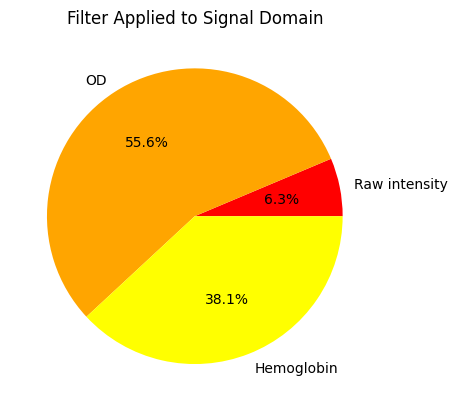

In [27]:
name = 'Filtered Signal'
strings = data[name]
signals = ['Raw intensity', 'OD', 'Hemoglobin']
sizes = []
for s in signals: 
    A = [strings == s ]
    sizes.append(np.sum( A ))

labels = list(signals)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = pretty_colors)
plt.title('Filter Applied to Signal Domain')

Text(0.5, 1.0, 'Non-GLM Methods')

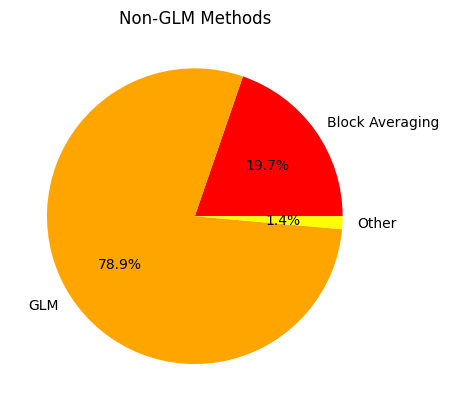

In [28]:
# Non-GLM: Method
name = 'Non-GLM: Method'
strings = data[name]
methods = ['Block Averaging', 'GLM', 'Other']
        
sizes = []
for s in methods: 
    A = [strings == s ]
    sizes.append(np.sum( A ))


labels = list(methods)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = pretty_colors)
plt.title('Non-GLM Methods')

Text(0, 0.5, 'Usage Percentage of Teams')

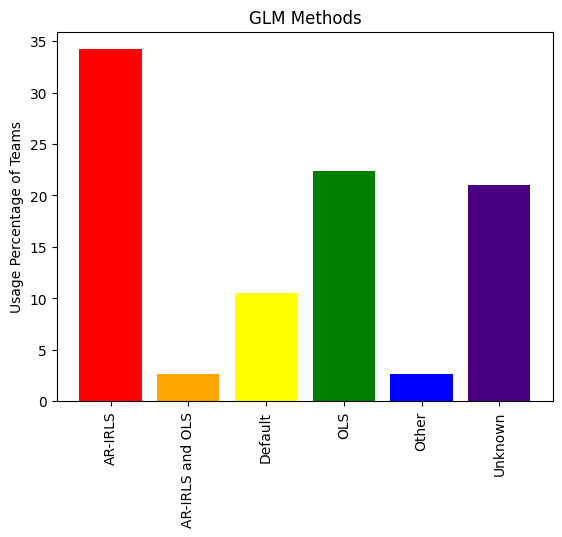

In [35]:
# GLM: Method 
name = 'GLM: Method'
strings = data[name]
newstrings= []
for word in strings: 
    if type(word) != str: 
        newstrings.append('Unknown')
    if word == 'Default - OLS' or word == 'OLS (Ordinary Least Squares)': 
        newstrings.append('OLS')
    if word == 'AR-IRLS' or  word == 'AR-IRLS (Autoregressive model based pre-whitening filter and robust regression)': 
        newstrings.append('AR-IRLS')
    if word == 'Default': 
        newstrings.append('Default')
    if word =='AR-IRLS (Autoregressive model based pre-whitening filter and robust regression),OLS (Ordinary Least Squares)':
        newstrings.append('AR-IRLS and OLS')
    if word == 'Other': 
        newstrings.append('Other')
         
label = sorted(list(set(newstrings)))
count = Counter(newstrings) 
sizes = []
for word in label: 
    sizes.append(100/teams * count[word])
plt.bar(label, sizes, color = pretty_colors )
plt.title('GLM Methods')
plt.xticks(label, rotation=90)
plt.ylabel('Usage Percentage of Teams')

Text(0.5, 1.0, 'HRF Regressors for GLM')

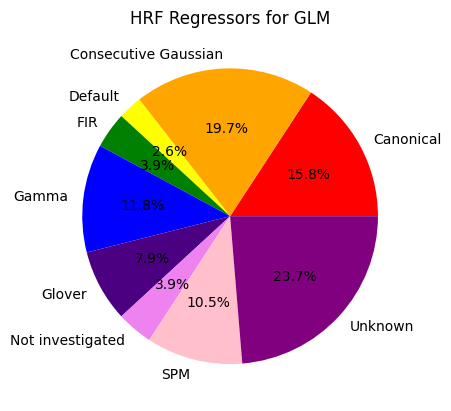

In [31]:
# GLM: HRF Regressor 
name = 'GLM: HRF Regressor'
strings = data[name].copy()

for i  in range(len(strings)): 
    if type(strings[i]) != str: 
        strings[i] = 'Unknown'
    if 'Consecutive Gaussian' in strings[i]: 
        strings[i] = 'Consecutive Gaussian'
        
labels = sorted(list(set(strings)))

sizes = []
for s in labels: 
    A = [strings == s ]
    sizes.append(int(np.sum( A )))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = pretty_colors)
plt.title('HRF Regressors for GLM')

Text(0, 0.5, 'Usage Percentage of Teams')

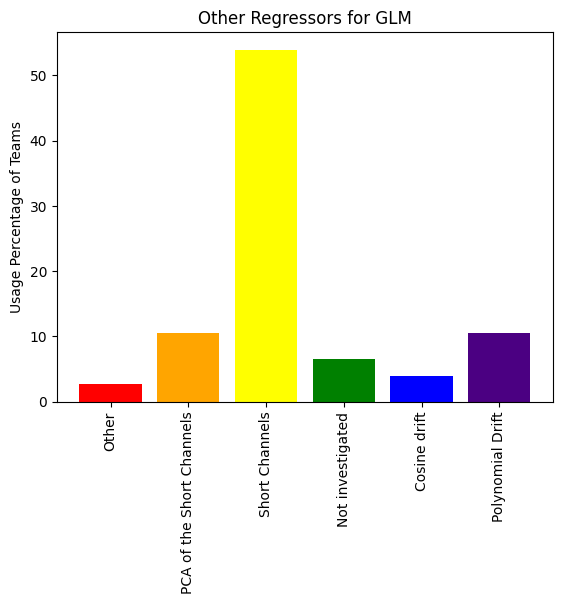

In [36]:
# GLM: Other Regressors 
# Are those two other options als short channel reg?? 
# Superficial signal regression of channels between 1-15 mm separation
# A General Linear Model (GLM) based short-channel regression (SSR) was performed 
# for each channel, using as regressor the highest correlation short distance detector (SDD) data

name = 'GLM: Other Regressors'
strings = data[name].copy()

# fix data 
for i in range(len(strings)): 
    if type(strings[i]) == str:
        if len(strings[i]) > 60: 
            strings[i] = 'Short Channels'
        
        
allmethods = []
for word in strings: 
    if type(word) == str:
        values = word.split(",")
        for i in values: 
            allmethods.append(i.strip())

methods = set(allmethods)
count = Counter(allmethods) 
label = list(methods)
sizes = []
for word in label: 
    sizes.append(100/teams * count[word])
    
plt.bar(label, sizes, color = pretty_colors )
plt.title('Other Regressors for GLM')
plt.xticks(label, rotation=90)
plt.ylabel('Usage Percentage of Teams')

Text(0, 0.5, 'Usage Percentage of Teams')

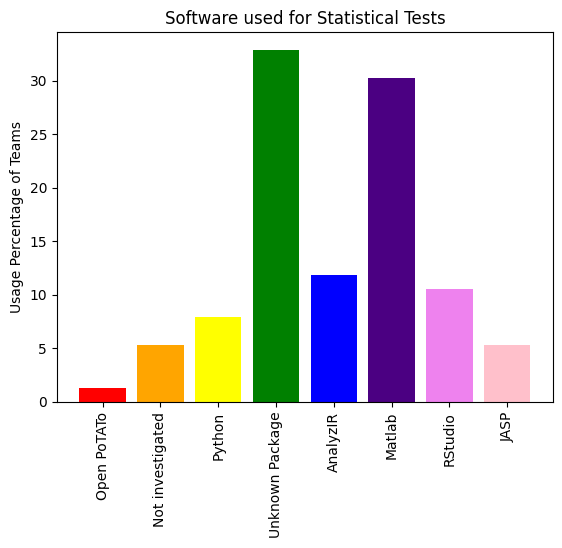

In [37]:
name = 'Stat Analysis: Software'
strings = data[name]
allmethods = []
for word in strings:
    if type(word) != str:
        allmethods.append('Unknown Package')
        
    if type(word) == str:
        values = word.split(",")
        for i in values: 
            allmethods.append(i.strip())

methods = set(allmethods)
count = Counter(allmethods) 
label = list(methods)
sizes = []
for word in label: 
    sizes.append(100/teams* count[word])

plt.bar(label, sizes, color = pretty_colors )
plt.title('Software used for Statistical Tests')
plt.xticks(label, rotation=90)
plt.ylabel('Usage Percentage of Teams')

Text(0, 0.5, 'Number of Groups')

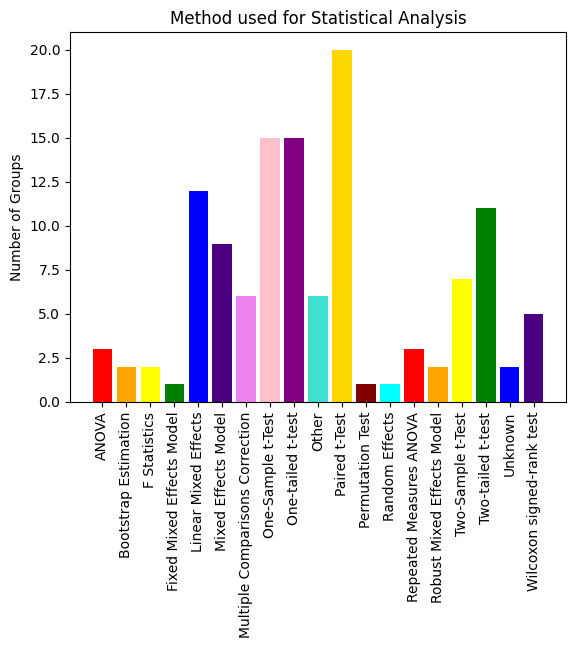

In [23]:
name = 'Stat Analysis: Method'
strings = data[name].values[:-6]
allmethods = []
for word in strings:
    if type(word) != str:
        allmethods.append('Unknown')
        
    if type(word) == str:
        values = word.split(",")
        for i in values: 
            allmethods.append(i.strip())

methods = set(allmethods)
count = Counter(allmethods) 
label = sorted(list(methods))
sizes = []
for word in label: 
    sizes.append(count[word])

plt.bar(label, sizes, color = pretty_colors )
plt.title('Method used for Statistical Analysis')
plt.xticks(label, rotation=90)
plt.ylabel('Number of Groups')

Text(0, 0.5, 'Usage Percentage of Teams')

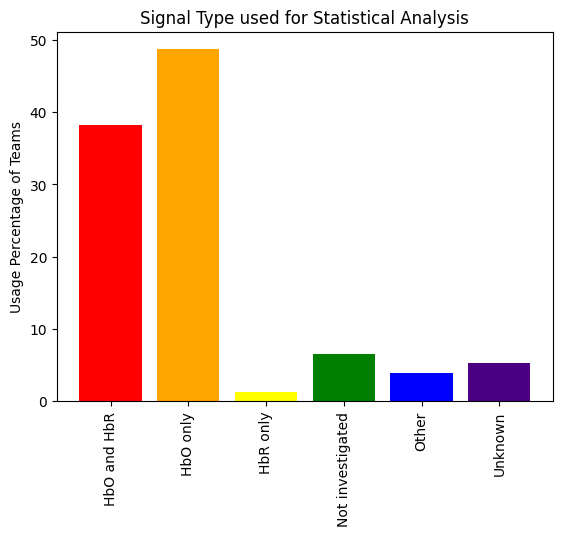

In [38]:
name= 'Stat Analysis: On Signal Type'
strings = data[name]
allmethods = []
for word in strings:
    if type(word) != str:
        allmethods.append('Unknown')
        
    if type(word) == str:
        values = word.split(",")
        for i in values: 
            allmethods.append(i.strip())

methods = set(allmethods)
count = Counter(allmethods) 
label = sorted(list(methods))
sizes = []
for word in label: 
    sizes.append(100/teams* count[word])

plt.bar(label, sizes, color = pretty_colors )
plt.title('Signal Type used for Statistical Analysis')
plt.xticks(label, rotation=90)
plt.ylabel('Usage Percentage of Teams')

Text(0, 0.5, 'Number of Groups')

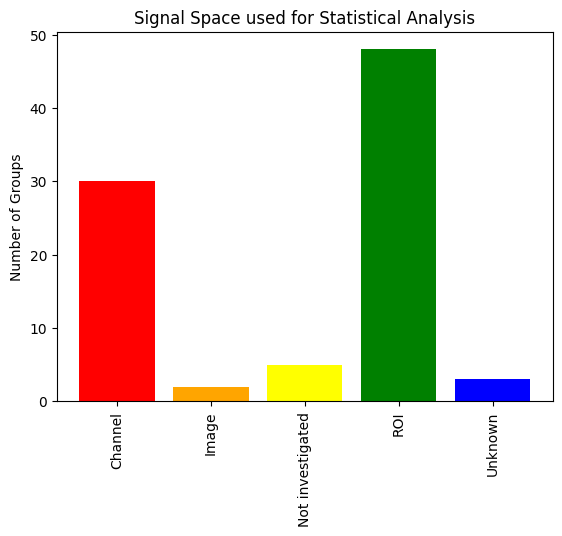

In [41]:
name = 'Stat Analysis: Signal Space'
strings = data[name]

allmethods = []
for word in strings:
    if type(word) != str:
        allmethods.append('Unknown')
        
    if type(word) == str:
        values = word.split(",")
        for i in values: 
            allmethods.append(i.strip())

methods = set(allmethods)
count = Counter(allmethods) 
label = sorted(list(methods))
sizes = []
for word in label: 
    sizes.append(count[word])

plt.bar(label, sizes, color = pretty_colors )
plt.title('Signal Space used for Statistical Analysis')
plt.xticks(label, rotation=90)
plt.ylabel('Number of Groups')

Text(0, 0.5, 'Usage Percentage of Teams')

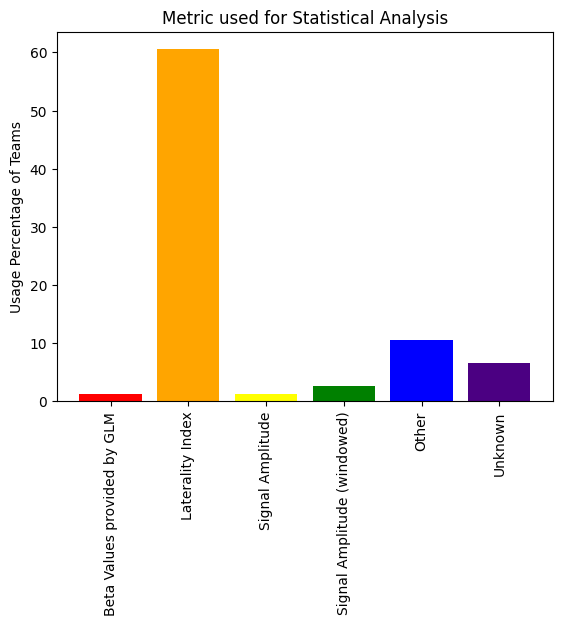

In [40]:
name = 'Stat Analysis: Metric'
strings = data[name]

allmethods = []
for word in strings:
    if type(word) != str:
        allmethods.append('unknown')
        
    if type(word) == str:
        word.replace(';', ',')
        values = word.split(',')
        for i in values: 
            allmethods.append(i.strip())

methods = set(allmethods)
count = Counter(allmethods) 
label = sorted(list(methods))
sizes = []
for word in label: 
    sizes.append(100/teams* count[word])
    
# correct other 
sizes = sizes[2:6] + [np.sum(sizes[:2])] + [sizes[-1]]
label = ['Beta Values provided by GLM', 'Laterality Index', 'Signal Amplitude', 'Signal Amplitude (windowed)', 'Other', 'Unknown']
plt.bar(label, sizes, color = pretty_colors )
plt.title('Metric used for Statistical Analysis')
plt.xticks(label, rotation=90)
plt.ylabel('Usage Percentage of Teams')

Text(0.5, 1.0, 'Test for Normality')

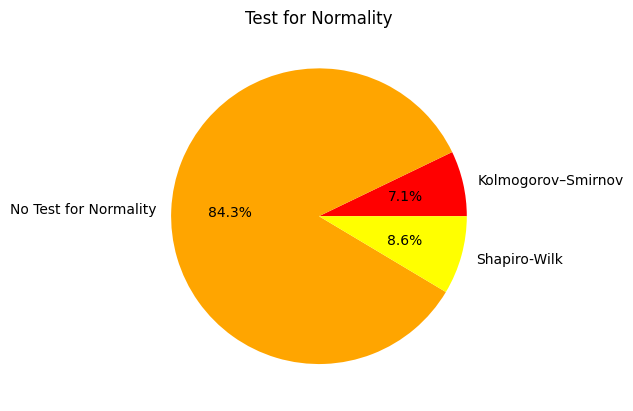

In [28]:
name= 'Test for Normality'
strings = data[name].values[:-6]
allmethods = []
for word in strings:
    if type(word) != str:
        allmethods.append('No Test for Normality') 
    if type(word) == str:
        word.replace(';', ',')
        values = word.split(',')
        for i in values: 
            allmethods.append(i.strip())

methods = set(allmethods)
count = Counter(allmethods) 
label = sorted(list(methods))
sizes = []
for word in label: 
    sizes.append(count[word])
    
plt.pie(sizes, labels=label, autopct='%1.1f%%', colors = pretty_colors)
plt.title(name)

Text(0.5, 1.0, 'Threshold (p< X) used for Statistical Analysis')

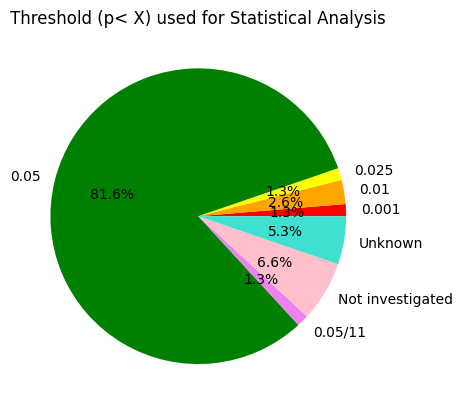

In [42]:
name = 'Stat Analysis: Threshold (p< X)'
strings = data[name]
allmethods = []
for word in strings:
    if type(word) != str:
        allmethods.append('Unknown') 
    if type(word) == str:
        if ';' in word: 
            word = '0.05'
        values = word.split(',')
        for i in values: 
            allmethods.append(i.strip())

methods = set(allmethods)
count = Counter(allmethods) 
label = sorted(list(methods))
sizes = []
for word in label: 
    sizes.append(count[word])
pretty_colors = {
    'red': '#FF0000',
    'orange': '#FFA500',
    'yellow': '#FFFF00',
    'green': '#008000',
    #'blue': '#0000FF',
    #'indigo': '#4B0082',
    'violet': '#EE82EE',
    'pink': '#FFC0CB',
    #'purple': '#800080',
    'turquoise': '#40E0D0',
    'gold': '#FFD700',
    'maroon': '#800000',
    'cyan': '#00FFFF',}   
plt.pie(sizes, labels=label, autopct='%1.1f%%', colors = pretty_colors)
plt.title('Threshold (p< X) used for Statistical Analysis')

Text(0, 0.5, 'Usage Percentage of Teams')

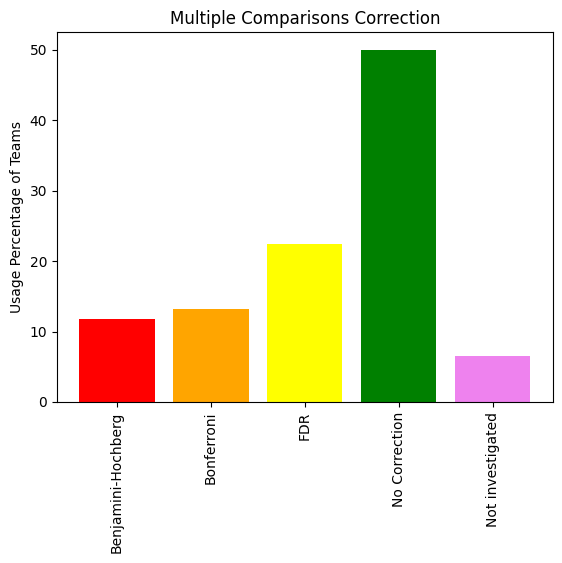

In [43]:
name = 'Multiple Comparisons Correction'
strings = data[name]
allmethods = []
for word in strings:
    if type(word) != str:
        allmethods.append('No Correction')  
    if type(word) == str:
        word.replace(';', ',')
        values = word.split(',')
        for i in values: 
            allmethods.append(i.strip())

methods = set(allmethods)
count = Counter(allmethods) 
label = sorted(list(methods))
sizes = []
for word in label: 
    sizes.append(100/teams* count[word])

plt.bar(label, sizes, color = pretty_colors )
plt.title('Multiple Comparisons Correction')
plt.xticks(label, rotation=90)
plt.ylabel('Usage Percentage of Teams')

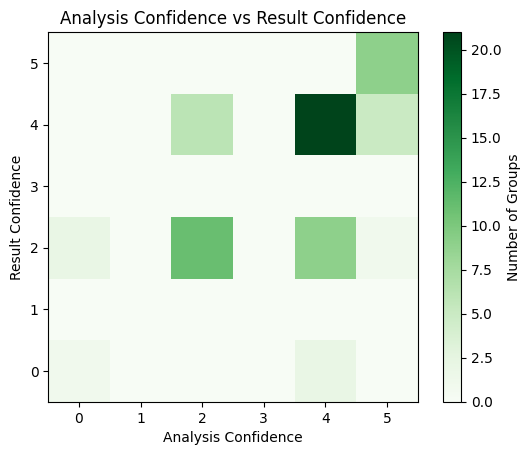

In [56]:
data = pd.read_csv('FreshData.csv', encoding='unicode_escape')
data = data.fillna('Not investigated')
data = data[data['Analysis Confidence'] != 'Not investigated' ]
data = data[data['Analysis Confidence'] != ' ' ]
name1 = 'Analysis Confidence'
values1 = np.float_(list(data[name1].values))
name2 = 'Results confidence'
values2 = np.float_(list(data[name2].values))



H, xedges, yedges = np.histogram2d(values1, values2, bins = 6)
fig, ax = plt.subplots()
im = ax.imshow(H.T, cmap='Greens')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Number of Groups')
plt.ylabel('Result Confidence')
plt.xlabel('Analysis Confidence')
plt.title('Analysis Confidence vs Result Confidence')
ax.invert_yaxis()
plt.show()